# Predicción del Precio de Casas

## Preguntas a responder
    1. ¿Cuáles son las variables que impactan más el precio de una propiedad?
    2. ¿Qué variables devalúan más una propiedad?
    3. ¿Qué variables aprecian más una propiedad?

### Explicación de campos:

En total hay 21 columnas el los datos, las cuáles se describen a continuación:

    1. ID: Correlativo númerico que distingue cada una de las casas vendidas.
    2. Date: Fecha en la cual fue vendida la casa.
    3. Price: Precio de venta de la casa (en dólares norteamericanos).
    4. Bedrooms: Número de cuartos en la casa.
    5. Bathrooms: Número de baños disponibles en la casa, donde un valor de 0.5 representa un baño con inodoro pero sin ducha.
    6. Sqft_living: Número de pies cuadrados del espacio habitable de la casa.
    7. Sqft_lot: Pies cuadrados del espacio total del terreno donde se ubica la casa.
    8. Floors: Cantidad de pisos en la casa.
    9. Waterfront: Variable que indica la presencia o no de vista al mar en la casa.
    10. View: Índice del 0 al 4 que indica que tan buena es la vista de la propiedad.
    11. Condition: Índice del 1 al 5 para calificar la condición actual de la casa.
    12. Grade: Índice del 1 al 13, el cuál califica el nivel de calidad de construcción de la casa.
    13. Sqft_above: Cantidad de pies cuadrados del espacio interior de la casa. que está sobre el nivel del suelo.
    14. Sqft_basement: Los pies cuadrados del espacio interior de la casa. que está por debajo del nivel del suelo.
    15. Yr_built: El año en fue construida la casa.
    16. Yr_renovated: Año de la última renovación de la casa.
    17. Zipcode: Código postal del areá donde se encuentra la casa.
    18. Lat: Latitud de la ubicación de la casa.
    19. Long: Longitud de la ubicación de la casa.
    20. Sqft_living15: Los pies cuadrados de espacio habitable de la casa interior para los 15 vecinos más cercanos.
    21. Sqft_lot15: Los metros cuadrados de los terrenos de los 15 vecinos más cercanos.

### 1. Importar librerías y cargar Dataset

In [156]:
#Importar librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime

# Leer el archivo CSV
df = pd.read_csv('C:/Users/Usuario/OneDrive/Escritorio/Carrera en Data Scientist/Curso 2. Data Science I - Fundamentos para la Ciencia de Datos/Data Science I_ Fundamentos para la Ciencia de Datos/Proyecto Héctor/kc_house_data.csv', encoding='latin1')

# Mostrar las primeras filas del DataFrame
print(df.head())



           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

### 2. Análisis Exploratorio de Datos (EDA)

#### 2.1 Inspección Inicial

In [101]:
# Mostrar las primeras filas del dataset
print(df.head())

# Resumen de las estadísticas descriptivas
print(df.describe())

# Información del dataset
print(df.info())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [132]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age', 'age_renovated'],
      dtype='object')


#### 2.2 Visualización de Datos

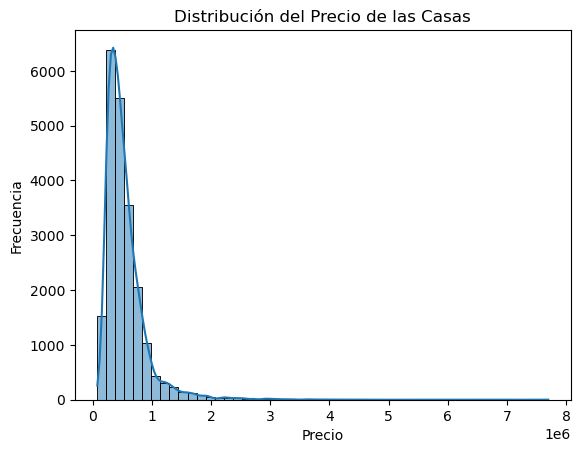

In [102]:
# Distribución del precio de las casas
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución del Precio de las Casas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

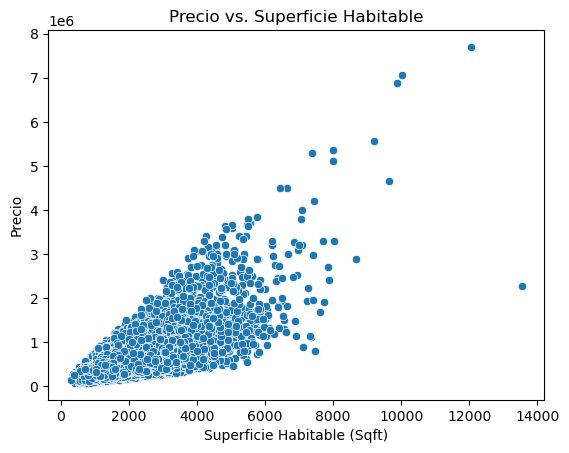

In [103]:
# Relación entre el precio y la superficie habitable
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Precio vs. Superficie Habitable')
plt.xlabel('Superficie Habitable (Sqft)')
plt.ylabel('Precio')
plt.show()



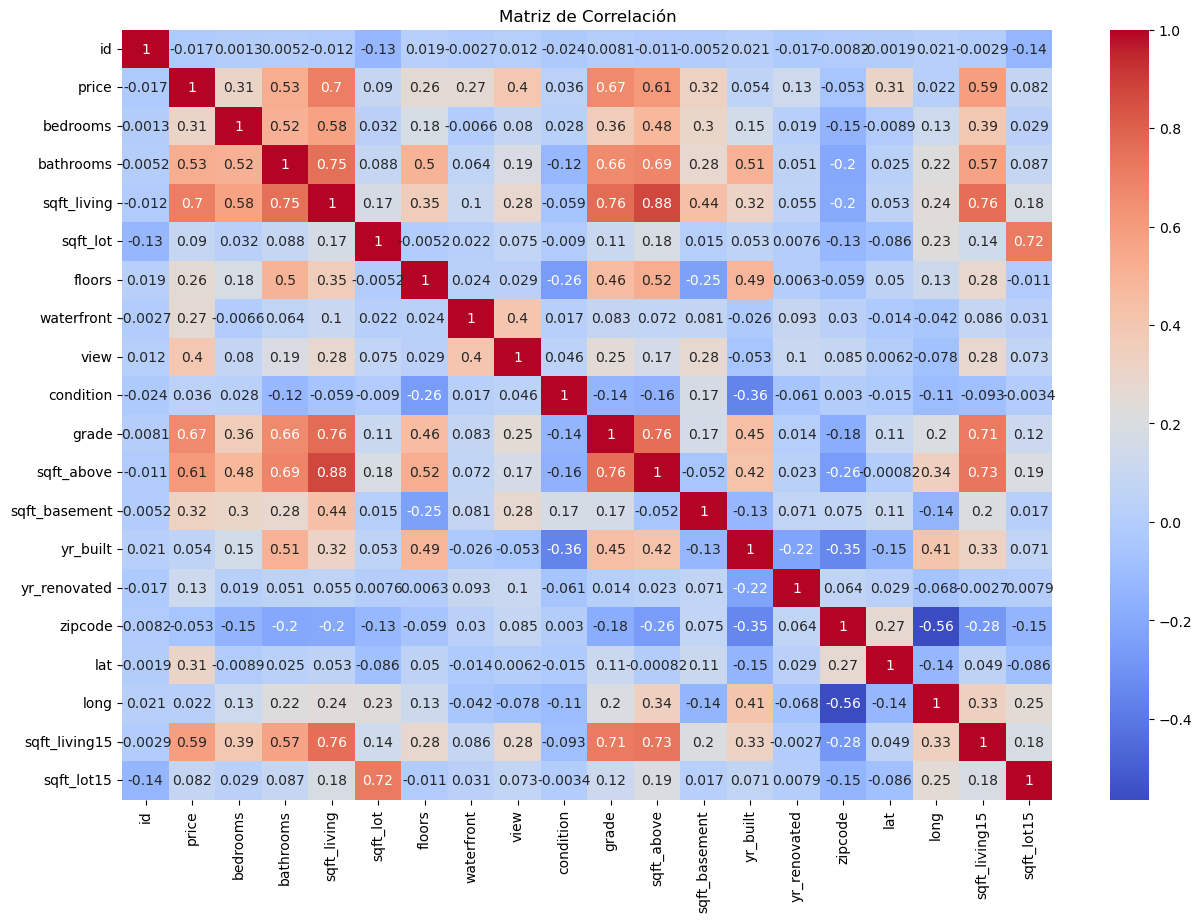

In [105]:
# Matriz de correlación
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Cada celda en el mapa de calor representa la correlación entre dos variables:

    1. Colores cálidos (rojos) indican correlaciones positivas. 
    2. Colores fríos (azules) indican correlaciones negativas. 
    3. La intensidad del color refleja la magnitud de la correlación.

### 3. Preprocesamiento de Datos

Limpieza y preparación de los datos para el modelado.

#### 3.1 Manejo de Valores Nulos

In [161]:
# Verificar valores nulos
print(df.isnull().sum())

# Reemplazar valores nulos en 'Yr_renovated' con 0 (si no ha sido renovada)
df['yr_renovated'].fillna(0, inplace=True)

# Si hay valores nulos en otras columnas, decidir cómo manejarlos (por ejemplo, eliminación o imputación)


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


#### 3.2 Codificación de Variables Categóricas

Si tenemos variables categóricas, convertiremos en variables numéricas.

In [107]:
# La variable 'Waterfront' es binaria, así que no necesita codificación adicional

#### 3.3 Feature Engineering

Crear nuevas características si es necesario.

In [162]:
# Limpiar los nombres de las columnas
df.columns = df.columns.str.strip()  # Eliminar espacios en blanco
df.columns = df.columns.str.lower()  # Convertir a minúsculas

# Convertir la fecha en formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el año de la fecha
df['year'] = df['date'].dt.year

# Edad de la casa
df['age'] = datetime.datetime.now().year - df['yr_built']

# Edad desde la última renovación
df['age_renovated'] = np.where(df['yr_renovated'] == 0, df['age'], datetime.datetime.now().year - df['yr_renovated'])

# Mostrar las primeras filas del dataset
print(df.head())

           id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  zipcode  \
0      5650     1.0           0     0  ...      1955             0    98178   
1      7242     2.0           0     0  ...      1951          1991    98125   
2     10000     1.0           0     0  ...      1933             0    98028   
3      5000     1.0           0     0  ...      1965             0    98136   
4      8080     1.0           0     0  ...      1987             0    98074   

       lat     long  sqft_living15  sqft_lot15  year  age  age_renovated  
0  47.5112 -122.2

### Paso 4: Selección de Características
Selecciona las características que se usarán para el modelo.

In [163]:
# Variables independientes (X) y dependiente (y)
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'age', 'age_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year']
X = df[features]
y = df['price']

### Paso 5: División del Dataset
Divide los datos en conjuntos de entrenamiento y prueba.

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Paso 6: Construcción del Modelo
Usa un modelo de regresión lineal como punto de partida.

In [165]:
# Inicializar el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

#Prueba con predicciones para el 2020
# Crear un nuevo DataFrame para las predicciones de 2020
df_2020 = df.copy()
df_2020['year'] = 2020

# Predecir precios para 2020
X_2020 = df_2020[features]
predictions_2020 = modelo.predict(X_2020)

# Añadir las predicciones al DataFrame
df_2020['Predicted_Price_2020'] = predictions_2020

# Mostrar algunas de las predicciones
print(df_2020[['id', 'price', 'Predicted_Price_2020']].head())  # Asegúrate de que 'id' y 'price' estén en minúsculas



MSE: 44960447884.58322
R2 Score: 0.7025967345539752
           id     price  Predicted_Price_2020
0  7129300520  221900.0         381619.884021
1  6414100192  538000.0         911253.535465
2  5631500400  180000.0         549903.976978
3  2487200875  604000.0         628773.115771
4  1954400510  510000.0         613566.572272


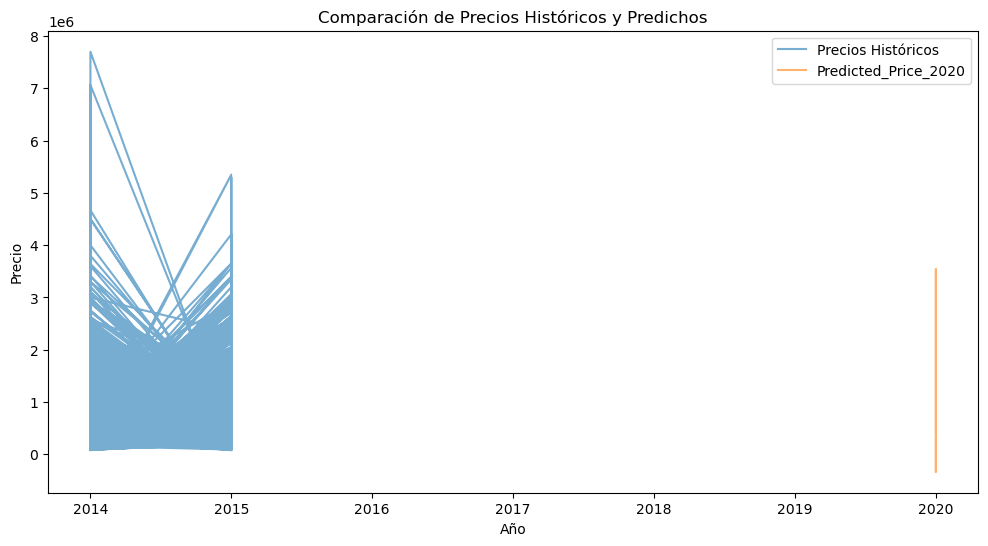

In [166]:
# Visualización de los precios históricos y predichos
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['price'], label='Precios Históricos', alpha=0.6)
plt.plot(df_2020['year'], df_2020['Predicted_Price_2020'], label='Predicted_Price_2020', alpha=0.6)
plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('Comparación de Precios Históricos y Predichos')
plt.legend()
plt.show()


           id  zipcode     price  prediction_year  predicted_price
0  7129300520    98178  221900.0             2015    230187.166555
1  6414100192    98125  538000.0             2015    759820.818000
2  5631500400    98028  180000.0             2015    398471.259512
3  2487200875    98136  604000.0             2015    477340.398306
4  1954400510    98074  510000.0             2015    462133.854807


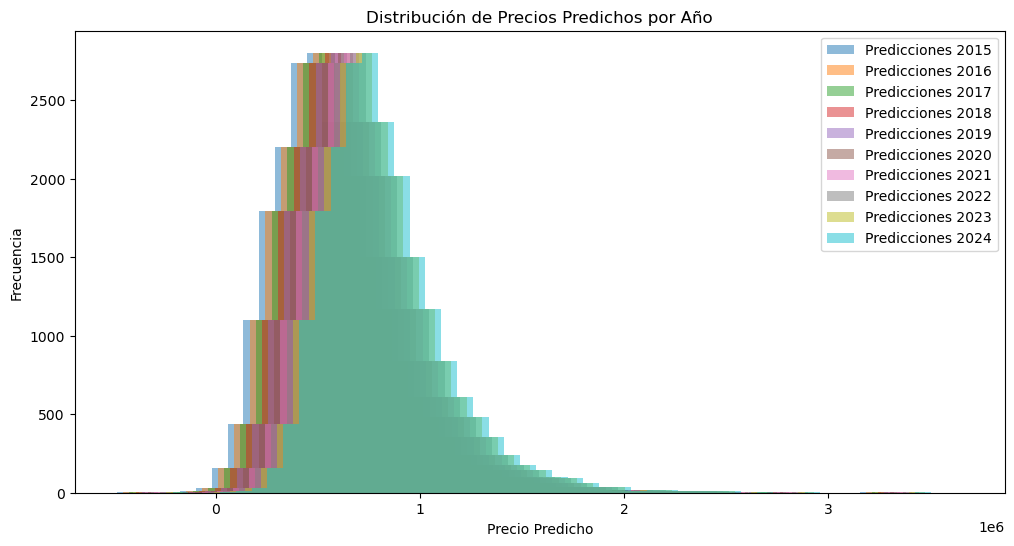

In [179]:
# Crear un DataFrame para almacenar las predicciones año por año
predictions_df = pd.DataFrame()

# Realizar predicciones para cada año desde 2015 hasta 2024
for year in range(2015, 2025):
    df_temp = df.copy()
    df_temp['year'] = year
    X_temp = df_temp[features]
    predictions = modelo.predict(X_temp)
    df_temp['predicted_price'] = predictions
    df_temp['prediction_year'] = year
    
    # Concatenar los resultados al DataFrame de predicciones
    predictions_df = pd.concat([predictions_df, df_temp[['id', 'zipcode', 'price', 'prediction_year', 'predicted_price']]], ignore_index=True)

# Mostrar algunas de las predicciones
print(predictions_df.head())

# Visualizar las predicciones año por año
plt.figure(figsize=(12, 6))
for year in range(2015, 2025):
    subset = predictions_df[predictions_df['prediction_year'] == year]
    plt.hist(subset['predicted_price'], bins=50, alpha=0.5, label=f'Predicciones {year}')

plt.xlabel('Precio Predicho')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios Predichos por Año')
plt.legend()

plt.show()


In [190]:
# Ajustar pandas para mostrar todas las filas del DataFrame
pd.set_option('display.max_rows', 50)
#Mostrar todas las predicciones
print(predictions_df)

                id  zipcode     price  prediction_year  predicted_price
0       7129300520    98178  221900.0             2015    230187.166555
1       6414100192    98125  538000.0             2015    759820.818000
2       5631500400    98028  180000.0             2015    398471.259512
3       2487200875    98136  604000.0             2015    477340.398306
4       1954400510    98074  510000.0             2015    462133.854807
...            ...      ...       ...              ...              ...
216125   263000018    98103  360000.0             2024    774168.267627
216126  6600060120    98146  400000.0             2024    729566.660822
216127  1523300141    98144  402101.0             2024    431004.620517
216128   291310100    98027  400000.0             2024    679535.957468
216129  1523300157    98144  325000.0             2024    433698.913323

[216130 rows x 5 columns]


   prediction_year  predicted_price
0             2015    560002.216926
1             2016    590288.760419
2             2017    620575.303912
3             2018    650861.847405
4             2019    681148.390898
5             2020    711434.934391
6             2021    741721.477884
7             2022    772008.021377
8             2023    802294.564870
9             2024    832581.108364


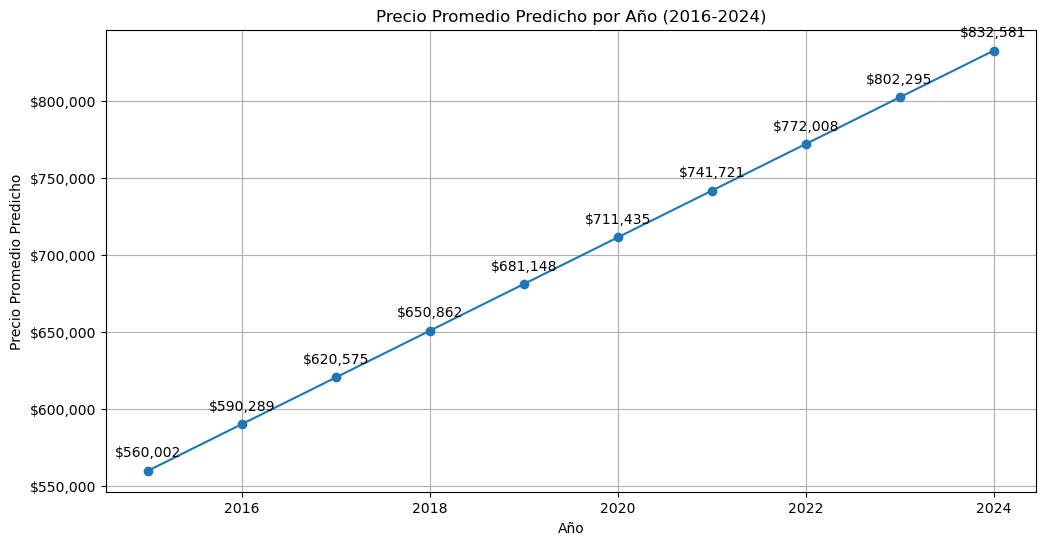

In [168]:
# Calcular el precio promedio predicho por año
average_predictions = predictions_df.groupby('prediction_year')['predicted_price'].mean().reset_index()

# Mostrar el DataFrame de promedios anuales
print(average_predictions)

# Función para formatear el precio en formato de moneda
def currency_format(x, pos):
    return '${:,.0f}'.format(x)

# Visualizar la serie de tiempo de precios promedio predichos por año
plt.figure(figsize=(12, 6))
plt.plot(average_predictions['prediction_year'], average_predictions['predicted_price'], marker='o')
plt.xlabel('Año')
plt.ylabel('Precio Promedio Predicho')
plt.title('Precio Promedio Predicho por Año (2016-2024)')
plt.grid(True)

# Ajustar el formato de los ejes para mostrar el precio completo y en formato de moneda
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(currency_format))
plt.ticklabel_format(style='plain', axis='x')

# Añadir etiquetas de datos
for i in range(len(average_predictions)):
    plt.annotate(currency_format(average_predictions['predicted_price'][i], None),
                 (average_predictions['prediction_year'][i], average_predictions['predicted_price'][i]),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

### Paso 7: Interpretación de Resultados
Analiza los resultados para ver cómo de bien se ajusta el modelo a los datos de prueba.

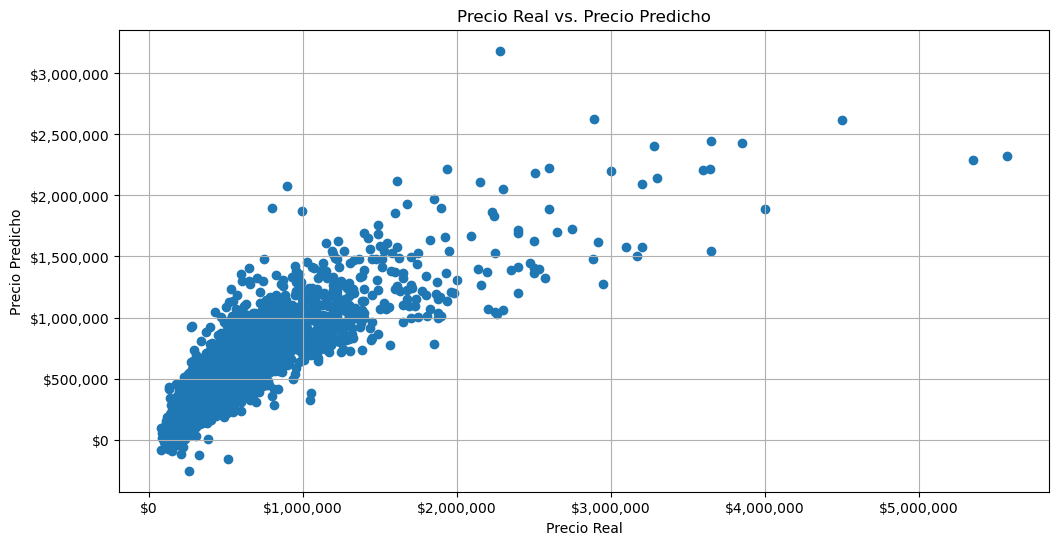

In [193]:
# Comparación de valores predichos vs reales
plt.figure(figsize=(12, 6))

plt.scatter(y_test, y_pred)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Precio Real vs. Precio Predicho')

# Formatear los ejes x e y para mostrar precios completos y en formato de moneda
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'${y:,.0f}'))

plt.grid(True)
plt.show()



### Paso 8: Mejora del Modelo
Prueba con modelos más complejos y técnicas de ajuste para mejorar el rendimiento.

#### 8.1 Regresión con Regularización
Prueba con modelos como Lasso, Ridge, o ElasticNet.

In [170]:
from sklearn.linear_model import Ridge

# Inicializar el modelo Ridge
modelo_ridge = Ridge(alpha=1.0)

# Entrenar el modelo
modelo_ridge.fit(X_train, y_train)

# Predicciones
y_pred_ridge = modelo_ridge.predict(X_test)

# Evaluación del modelo
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'MSE Ridge: {mse_ridge}')
print(f'R2 Score Ridge: {r2_ridge}')


MSE Ridge: 44972244835.30345
R2 Score Ridge: 0.7025187003743445


#### 8.2 Modelos No Lineales
Prueba con modelos como Random Forest, Gradient Boosting, etc.

In [171]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar el modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Evaluación del modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'MSE Random Forest: {mse_rf}')
print(f'R2 Score Random Forest: {r2_rf}')


MSE Random Forest: 22105013108.799747
R2 Score Random Forest: 0.8537803026749102
